In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from models.multiscale_vae import MultiscaleVariationalAutoencoder

import utils
import utils.transform

Using TensorFlow backend.


In [2]:
# run params
SECTION = "vae"
RUN_ID = "0002"
DATA_NAME = "digits"
BASE_DIR= "./run"
BASE_DIR_SECTION = "{0}/{1}/".format(BASE_DIR, SECTION)
RUN_FOLDER = BASE_DIR_SECTION + "_".join([RUN_ID, DATA_NAME])

if not os.path.exists(BASE_DIR):
    os.mkdir(BASE_DIR)
    
if not os.path.exists(BASE_DIR_SECTION):
    os.mkdir(BASE_DIR_SECTION)
    
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, "viz"))
    os.mkdir(os.path.join(RUN_FOLDER, "images"))
    os.mkdir(os.path.join(RUN_FOLDER, "weights"))

mode = "build"

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

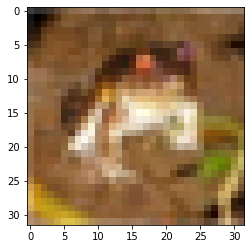

In [4]:
# Display original
plt.figure()
plt.imshow(x_train[0,:,:,:]) 
plt.show()  

In [5]:
multiscale_vae = MultiscaleVariationalAutoencoder(
    input_dims=(32,32,3), 
    levels=4, 
    z_dims=[32,32,32,32])

In [6]:
LEARNING_RATE = 0.001
R_LOSS_FACTOR = 100
KL_LOSS_FACTOR = 10

In [7]:
multiscale_vae.compile(
    learning_rate=LEARNING_RATE, 
    r_loss_factor=R_LOSS_FACTOR,
    kl_loss_factor=KL_LOSS_FACTOR
)

In [8]:
EPOCHS = 100
BATCH_SIZE = 32
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [9]:
# serialize model to JSON
model_json = multiscale_vae.model_trainable.to_json()
with open("model_trainable.json", "w") as json_file:
    json_file.write(model_json)

In [10]:
# serialize model to JSON
model_json = multiscale_vae.model_predict.to_json()
with open("model_predict.json", "w") as json_file:
    json_file.write(model_json)

In [11]:
multiscale_vae.train(     
    x_train, 
    batch_size = BATCH_SIZE, 
    epochs = EPOCHS, 
    run_folder = RUN_FOLDER, 
    print_every_n_batches = PRINT_EVERY_N_BATCHES, 
    initial_epoch = INITIAL_EPOCH,
    step_size=10,
    lr_decay=0.9
)

Epoch 1/100
50000/50000 [==============================] - 105s 2ms/step - loss: 141.2815 - activation_2_loss: 32.4439 - add_1_loss: 34.9541 - add_2_loss: 36.7991 - add_3_loss: 37.0652 - activation_2_vae_r_loss: 24.9736 - activation_2_vae_kl_loss: 7.4751 - add_1_vae_r_loss: 27.4837 - add_1_vae_kl_loss: 7.4751 - add_2_vae_r_loss: 29.3289 - add_2_vae_kl_loss: 7.4751 - add_3_vae_r_loss: 29.5948 - add_3_vae_kl_loss: 7.4751

Epoch 00001: saving model to ./run/vae/0002_digits\weights/weights-001-141.28.h5

Epoch 00001: saving model to ./run/vae/0002_digits\weights/weights.h5
Epoch 2/100
50000/50000 [==============================] - 92s 2ms/step - loss: 78.0349 - activation_2_loss: 17.1452 - add_1_loss: 19.4535 - add_2_loss: 20.5207 - add_3_loss: 20.9131 - activation_2_vae_r_loss: 17.0651 - activation_2_vae_kl_loss: 0.0804 - add_1_vae_r_loss: 19.3736 - add_1_vae_kl_loss: 0.0804 - add_2_vae_r_loss: 20.4410 - add_2_vae_kl_loss: 0.0804 - add_3_vae_r_loss: 20.8337 - add_3_vae_kl_loss: 0.0804TA: 

KeyboardInterrupt: 

In [12]:
results = multiscale_vae.model_predict.predict(x_train[0:1,:,:,:])

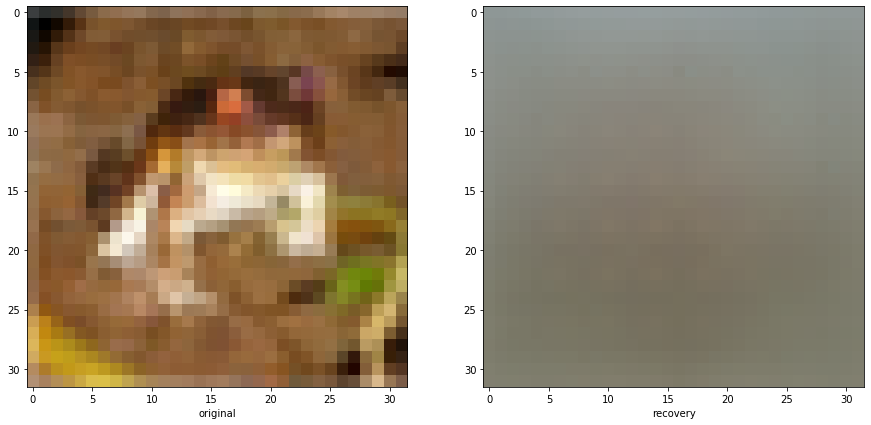

In [20]:
fig, axs = plt.subplots(5, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[0,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[0,:,:,:])
plt.xlabel("recovery")
plt.show() 